In [1]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl

import json
import os
import statsmodels.api as sm
from scipy import stats
s = json.load(open("fbb_matplotlibrc.json"))
pl.rcParams.update(s)



%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\wentao\Anaconda\lib\site-packages\matplotlib\__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#to use the url just pas it to pandas read_excell
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"
#split your data by male and female, for example you can load the data into 2 disctionary. other variables may be relevant: for example race.
#the names are not informative, and i am not giving you any meta data to find out what is in each file. 
# 08_2 files are male, 08_3 are female, and I am leaving in the lines of code that read the male files into races

allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)
allfemales={}
allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

In [3]:
from pandas.tools.plotting import scatter_matrix
#scatter_matrix(...

#like for the building homework: this fails cause the data is not parsed and formatted propoerly
#so maybe just print the columns to find out
print allmales['all'].columns

Index([u'Characteristic', u'Total with Income', u'$1 to $2,499 or loss', u'$2,500 to $4,999', u'$5,000 to $7,499', u'$7,500 to $9,999', u'$10,000 to $12,499', u'$12,500 to $14,999', u'$15,000 to $17,499', u'$17,500 to $19,999', u'$20,000 to $22,499', u'$22,500 to $24,999', u'$25,000 to $27,499', u'$27,500 to $29,999', u'$30,000 to $32,499', u'$32,500 to $34,999', u'$35,000 to $37,499', u'$37,500 to $39,999', u'$40,000 to $42,499', u'$42,500 to $44,999', u'$45,000 to $47,499', u'$47,500 to $49,999', u'$50,000 to $52,499', u'$52,500 to $54,999', u'$55,000 to $57,499', u'$57,500 to $59,999', u'$60,000 to $62,499', u'$62,500 to $64,999', u'$65,000 to $67,499', u'$67,500 to $69,999', u'$70,000 to $72,499', u'$72,500 to $74,999', u'$75,000 to $77,499', u'$77,500 to $79,999', u'$80,000 to $82,499', u'$82,500 to $84,999', u'$85,000 to $87,499', u'$87,500 to $89,999', u'$90,000 to $92,499', u'$92,500 to $94,999', u'$95,000 to $97,499', u'$97,500 to $99,999', u'$100,000 and over', u'Median incom

In [4]:
for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

C:\Users\wentao\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\wentao\Anaconda\lib\site-packages\IPython\kernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


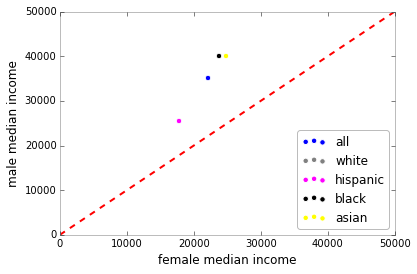

In [5]:
# female median income based on races:
incfA = allfemales['all']['Median income'][1]
incfW = allfemales['white']['Median income'][1]
incfH = allfemales['hispanic']['Median income'][1]
incfB = allfemales['white']['Median income'][1]
incfY = allfemales['asian']['Median income'][1]
# male median income based on races:
incmA = allmales['all']['Median income'][1]
incmW = allmales['white']['Median income'][1]
incmH = allmales['hispanic']['Median income'][1]
incmB = allmales['white']['Median income'][1]
incmY = allmales['asian']['Median income'][1]
#plot all the female vs male median income dots
plt.scatter(incfA, incmA, s=30, c='b', label='all')
plt.scatter(incfW, incmW, s=30, c='grey', label='white')
plt.scatter(incfH, incmH, s=30, c='magenta', label='hispanic')
plt.scatter(incfB, incmB, s=30, c='black', label='black')
plt.scatter(incfY, incmY, s=30, c='yellow', label='asian')
plt.xlim((0, 50000))
plt.ylim((0, 50000))
plt.grid()
plt.xlabel('female median income')
plt.ylabel('male median income')
plt.legend(loc=4)
#plot the dividing line
plt.plot((0,50000), (0,50000), 'r--')

In [6]:
#fit and plot here
#[...]
X = [incfA, incfW, incfH, incfB, incfY]
Y = [incmA, incmW, incmH, incmB, incmY]
X1 = sm.add_constant(X, prepend = False)
model1 = sm.OLS(Y, X1).fit()
print model1.summary()
w1, w0 = model1.params

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     125.5
Date:                Wed, 14 Oct 2015   Prob (F-statistic):            0.00152
Time:                        16:33:51   Log-Likelihood:                -40.962
No. Observations:                   5   AIC:                             85.92
Df Residuals:                       3   BIC:                             85.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.2576      0.202     11.204      0.0

C:\Users\wentao\Anaconda\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


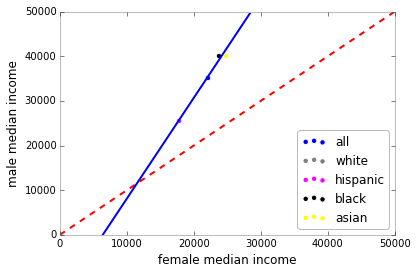

In [12]:
plt.scatter(incfA, incmA, s=30, c='b', label='all')
plt.scatter(incfW, incmW, s=30, c='grey', label='white')
plt.scatter(incfH, incmH, s=30, c='magenta', label='hispanic')
plt.scatter(incfB, incmB, s=30, c='black', label='black')
plt.scatter(incfY, incmY, s=30, c='yellow', label='asian')
plt.xlim((0, 50000))
plt.ylim((0, 50000))
plt.grid()
plt.xlabel('female median income')
plt.ylabel('male median income')
plt.legend(loc=4)
plt.plot((0,50000), (0,50000), 'r--')
xl = np.arange(0,35000,1)
#my new line
yl = w1*xl + w0
plt.plot(xl, yl, 'b')

In [13]:
cor = stats.spearmanr(Y, X)
np.std(Y)/np.std(X)
beta1=cor[0]*np.std(X)/np.std(Y)
beta0=np.mean(Y)-beta1*np.mean(X)

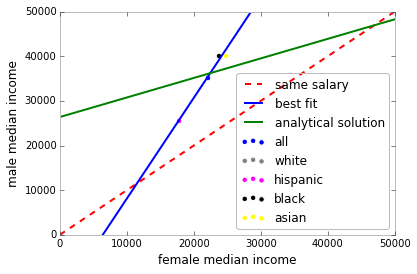

In [14]:
plt.scatter(incfA, incmA, s=30, c='b', label='all')
plt.scatter(incfW, incmW, s=30, c='grey', label='white')
plt.scatter(incfH, incmH, s=30, c='magenta', label='hispanic')
plt.scatter(incfB, incmB, s=30, c='black', label='black')
plt.scatter(incfY, incmY, s=30, c='yellow', label='asian')
plt.xlim((0, 50000))
plt.ylim((0, 50000))
plt.grid()
plt.xlabel('female median income')
plt.ylabel('male median income')
plt.plot((0,50000), (0,50000), 'r--', label='same salary')
xl = np.arange(0,50000,1)
#my new line
yl = w1*xl + w0
plt.plot(xl, yl, 'b', label='best fit')
#analytical solution
y2 = beta1*xl + beta0
plt.plot(xl, y2, 'g', label='analytical solution')
plt.legend(loc=4)

In [15]:
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())

allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask

In [16]:
X2 = sm.add_constant(all_females[~all_females.mask], prepend = False)
Y1 = all_males[~all_males.mask]
model2 = sm.OLS(Y1, X2).fit()
print model2.summary()
b1, b0 = model2.params

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1075.
Date:                Wed, 14 Oct 2015   Prob (F-statistic):           7.21e-77
Time:                        16:38:57   Log-Likelihood:                -1743.6
No. Observations:                 178   AIC:                             3491.
Df Residuals:                     176   BIC:                             3498.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.4110      0.043     32.787      0.0

In [17]:
cor1 = stats.spearmanr(Y1, all_females[~all_females.mask])
beta1_1=cor1[0]*np.std(all_females[~all_females.mask])/np.std(Y1)
beta0_1=np.mean(Y1)-beta1*np.mean(all_females[~all_females.mask])

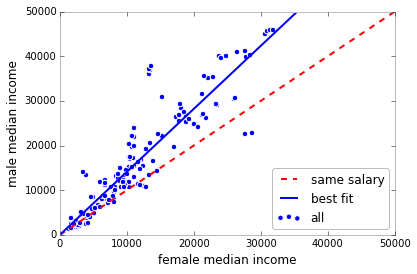

In [18]:
# then plot it
plt.scatter(all_females, all_males, s=30, c='b', label='all')
plt.xlim((0, 50000))
plt.ylim((0, 50000))
plt.grid()
plt.xlabel('female median income')
plt.ylabel('male median income')
plt.plot((0,50000), (0,50000), 'r--', label='same salary')
xl = np.arange(0,50000,1)
# creat a new line here
y3 = b1*xl + b0
plt.plot(xl, y3, 'b', label='best fit')
plt.legend(loc=4)